<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/Bonus_Work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Implement Professor's GitHub Model

## Import libraries and connect to Kaggle

In [1]:
# !pip install intel-tensorflow

In [2]:
# from tensorflow.python.util import _pywrap_util_port
# _pywrap_util_port.IsMklEnabled()

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [4]:
print("GPU Available: ", tf.test.is_gpu_available())
# print("GPu Available 2 :", tf.config.list_physical_devices('GPU'))
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.8.0
Keras Version:  2.8.0


In [5]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
! nvidia-smi

Tue May  3 04:02:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    73W / 149W |    145MiB / 11441MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!pip install kaggle

In [8]:
! mkdir /content/drive/MyDrive/kaggle

mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle’: File exists


In [9]:
!ls /content/drive/MyDrive/kaggle

kaggle.json


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [11]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


## Load Kaggle Data

In [12]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:13<00:00, 68.6MB/s]
100% 612M/612M [00:13<00:00, 49.0MB/s]


In [13]:
%ls

kaggle.json


In [14]:
!kaggle config view #View current config values

Configuration values from /content/drive/MyDrive/kaggle
- username: gr00t16
- path: /content
- proxy: None
- competition: None


In [15]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [16]:
#changing the working directory
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!pwd
!ls

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
gtsrb-german-traffic-sign.zip


In [17]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [18]:
os.chdir('/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')
!ls 

gtsrb-german-traffic-sign.zip  Meta	 test  Test.csv  Train
meta			       Meta.csv  Test  train	 Train.csv


In [19]:
train_df = pd.read_csv('Train.csv')
# display a sneak peek of the data
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [20]:
print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 43


In [21]:
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

In [22]:
# add column with readable labels
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Turn right
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Turn right
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Turn right
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Turn right
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Turn right


In [23]:
train_df.shape

(39209, 9)

## load these images off disk using 
image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [24]:
base_dir = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train'
print(base_dir)

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train


In [25]:
batch_size = 32
img_height = 28 #180
img_width = 28 #180

In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [29]:
labels = ['Speed Limit (20Km/H)', 'Speed Limit (30Km/H)','No Passing For Vechiles Over 3.5 Metric Tons','Right-Of-Way At The Next Intersection', 'Priority Road', 'Yield', 'Stop', 'No Vechiles', 'Vechiles Over 3.5 Metric Tons Prohibited', 'No Entry',
 'General Caution', 'Dangerous Curve To The Left', 'Speed Limit (50Km/H)',
 'Dangerous Curve To The Right', 'Double Curve', 'Bumpy Road',
 'Slippery Road', 'Road Narrows On The Right', 'Road Work', 'Traffic Signals',
 'Pedestrians', 'Children Crossing', 'Bicycles Crossing',
 'Speed Limit (60Km/H)', 'Beware Of Ice/Snow', 'Wild Animals Crossing',
 'End Of All Speed And Passing Limits', 'Turn Right Ahead',
 'Turn Left Ahead', 'Ahead Only', 'Go Straight Or Right',
 'Go Straight Or Left', 'Keep Right', 'Keep Left', 'Speed Limit (70Km/H)',
 'Roundabout Mandatory', 'End Of No Passing',
 'End Of No Passing By Vechiles Over 3.5 Metric Tons',
 'Speed Limit (80Km/H)', 'End Of Speed Limit (80Km/H)',
 'Speed Limit (100Km/H)', 'Speed Limit (120Km/H)', 'No Passing']

In [30]:
len(labels)

43

In [31]:
labels[int(class_names[0])] # convert to label

'Speed Limit (20Km/H)'

5
17
9
5
3
18
15
23
32


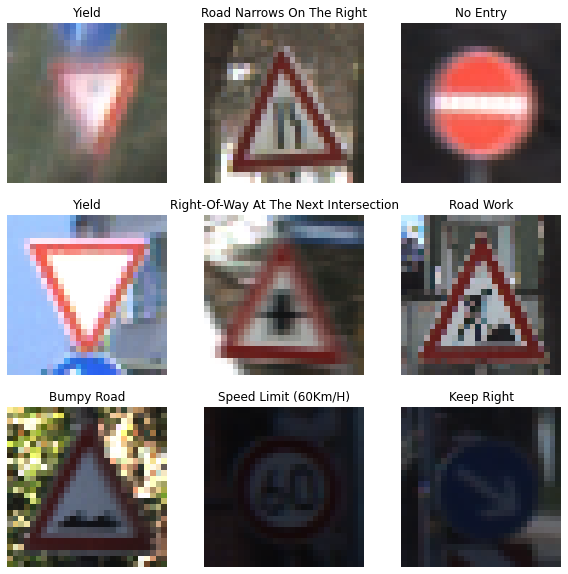

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    classid=groundlabels[i].numpy()
    print(classid)
    plt.title(labels[classid])
    plt.axis("off")

In [33]:
# manually iterate over the dataset and retrieve batches of images:
# This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). 
# The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [34]:
image_batch

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[103.61607 ,  93.42857 ,  81.459816],
         [ 93.55357 , 109.79464 , 109.30357 ],
         [140.75446 , 117.55357 , 116.5759  ],
         ...,
         [ 67.49552 ,  57.71874 ,  45.013386],
         [ 79.553566,  68.848206,  51.303574],
         [ 87.102684,  80.04912 ,  55.29018 ]],

        [[ 96.72768 , 113.4375  , 104.28572 ],
         [ 69.90179 ,  87.01785 ,  88.03571 ],
         [172.52232 , 151.64285 , 150.34375 ],
         ...,
         [ 72.79463 ,  59.01339 ,  42.3125  ],
         [ 77.56697 ,  62.852676,  41.638397],
         [ 95.28126 ,  83.75    ,  59.3884  ]],

        [[173.35268 , 155.15625 , 147.5982  ],
         [135.05803 , 103.4241  ,  97.06696 ],
         [113.803566, 124.58035 , 115.21875 ],
         ...,
         [ 80.70088 ,  71.13839 ,  50.000004],
         [ 80.566986,  65.13394 ,  36.35717 ],
         [ 76.28125 ,  64.9375  ,  42.544647]],

        ...,

        [[ 59.450893,  51.245537,  

In [35]:
#Standardize the data, standardize values [0, 255] to be in the [0, 1]
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#There are two ways to use this layer. You can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.031257536 0.40103042


In [36]:
#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
num_classes = len(class_names)
num_classes

43

## Model from Professor's Github.

Model's link : https://github.com/lkk688/MultiModalClassifier/blob/main/TFClassifier/myTFmodels/CNNsimplemodels.py

In [38]:
from tensorflow import keras
from keras.models import Sequential
input_shape = (28,28,3)

In [39]:
## Model 1:  works but gives Overfitting ##
# def create_simplemodel4(numclasses, img_shape, metrics=['accuracy']):
#     data_augmentation = keras.Sequential(
#         [
#             layers.experimental.preprocessing.RandomFlip("horizontal", 
#                                                         input_shape=img_shape),
#             layers.experimental.preprocessing.RandomRotation(0.1),
#             layers.experimental.preprocessing.RandomZoom(0.1),
#         ]
#     )

#     model = Sequential([
#         data_augmentation,
#         #layers.experimental.preprocessing.Rescaling(1./255),
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(0.2),
#         layers.Flatten(),
#         layers.Dense(128, activation='relu'),
#         layers.Dense(numclasses)
#         ])
    
#     model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=metrics)
#     return model

# history = create_simplemodel4(num_classes, input_shape, metrics=['accuracy']).fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=20
# )

In [40]:
#create_simplemodel4(num_classes, input_shape, metrics=['accuracy']).summary()

In [41]:
## Model 2 :
from time import time
start_v1 = time()

def create_simplemodel3(numclasses, img_shape, metrics=['accuracy']):
    model = Sequential([
        #layers.experimental.preprocessing.Rescaling(1./255, input_shape=img_shape),
        layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=img_shape),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(numclasses) #activation='softmax'
        ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

model = create_simplemodel3(num_classes, input_shape, metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)
finish_v1 = time()

Epoch 1/20
981/981 [==============================] - 28s 19ms/step - loss: 1.6337 - accuracy: 0.5819 - val_loss: 0.5115 - val_accuracy: 0.8533
Epoch 2/20
981/981 [==============================] - 6s 7ms/step - loss: 0.3640 - accuracy: 0.8935 - val_loss: 0.3349 - val_accuracy: 0.9027
Epoch 3/20
981/981 [==============================] - 6s 6ms/step - loss: 0.2246 - accuracy: 0.9362 - val_loss: 0.3945 - val_accuracy: 0.9078
Epoch 4/20
981/981 [==============================] - 6s 7ms/step - loss: 0.1666 - accuracy: 0.9542 - val_loss: 0.2031 - val_accuracy: 0.9478
Epoch 5/20
981/981 [==============================] - 6s 6ms/step - loss: 0.1595 - accuracy: 0.9546 - val_loss: 0.1942 - val_accuracy: 0.9545
Epoch 6/20
981/981 [==============================] - 6s 6ms/step - loss: 0.1426 - accuracy: 0.9622 - val_loss: 0.2323 - val_accuracy: 0.9501
Epoch 7/20
981/981 [==============================] - 6s 7ms/step - loss: 0.1069 - accuracy: 0.9704 - val_loss: 0.2778 - val_accuracy: 0.9490
Epoc

In [42]:
time_taken = finish_v1 - start_v1
print("Time taken by this model with Normal Tensorflow is = ", time_taken)

Time taken by this model with Normal Tensorflow is =  192.16167879104614


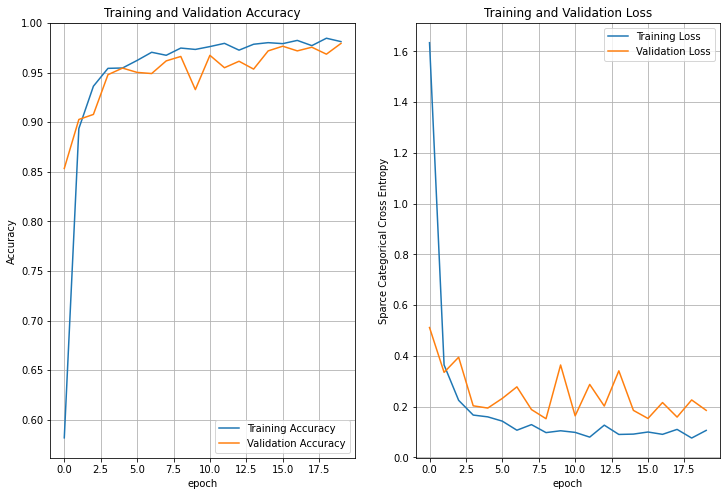

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.xlabel('epoch')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('traininghistory.pdf')

In [44]:
%cd /content/

/content


In [45]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')
model.save('my_model.h5')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [46]:
!ls saved_model/my_model

assets	keras_metadata.pb  saved_model.pb  variables


In [50]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpkm7u5544/assets


In [51]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [52]:
!cp /content/my_model.h5 /content/drive/MyDrive/255-04

In [53]:
!cp /content/model.tflite /content/drive/MyDrive/255-04

In [54]:
%cp -R /content/saved_model/ /content/drive/MyDrive/255-04/

# Part 2 : Nvidia Acceleration with Tensorflow

In [55]:
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

In [56]:
## Model 2 :
from time import time
start_v2 = time()

def create_simplemodel3(numclasses, img_shape, metrics=['accuracy']):
    model = Sequential([
        #layers.experimental.preprocessing.Rescaling(1./255, input_shape=img_shape),
        layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=img_shape),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(numclasses) #activation='softmax'
        ])
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=metrics)
    return model

model = create_simplemodel3(num_classes, input_shape, metrics=['accuracy'])
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)
finish_v2 = time()

Epoch 1/20
981/981 [==============================] - 8s 8ms/step - loss: 1.8215 - accuracy: 0.5740 - val_loss: 0.6030 - val_accuracy: 0.8314
Epoch 2/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3678 - accuracy: 0.8936 - val_loss: 0.2895 - val_accuracy: 0.9245
Epoch 3/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2074 - accuracy: 0.9418 - val_loss: 0.2822 - val_accuracy: 0.9271
Epoch 4/20
981/981 [==============================] - 6s 6ms/step - loss: 0.1511 - accuracy: 0.9560 - val_loss: 0.1565 - val_accuracy: 0.9622
Epoch 5/20
981/981 [==============================] - 8s 8ms/step - loss: 0.1413 - accuracy: 0.9619 - val_loss: 0.1485 - val_accuracy: 0.9635
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1121 - accuracy: 0.9676 - val_loss: 0.1696 - val_accuracy: 0.9637
Epoch 7/20
981/981 [==============================] - 8s 8ms/step - loss: 0.1255 - accuracy: 0.9663 - val_loss: 0.1592 - val_accuracy: 0.9631
Epoch 

In [57]:
time_taken = finish_v2 - start_v2
print("Time taken by this model with Normal Tensorflow is = ", time_taken)

Time taken by this model with Normal Tensorflow is =  162.19157361984253


##Acceleration Comparison

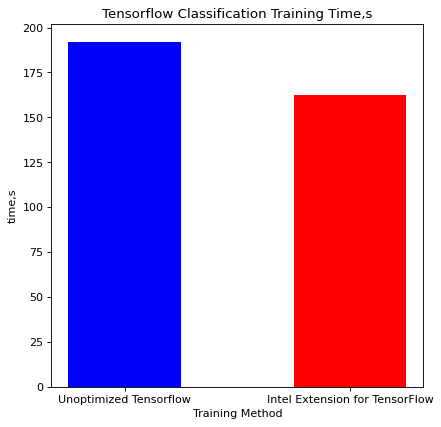

Performance Speedup:  1.1847821344988607


In [58]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6,6), dpi=80)
left = [1,2]
pred_times = [finish_v1 - start_v1, finish_v2 - start_v2]
tick_label = ['Unoptimized Tensorflow','Intel Extension for TensorFlow']
ax = plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Training Method'); plt.ylabel('time,s'); plt.title('Tensorflow Classification Training Time,s')
plt.show()
print("Performance Speedup: ",(finish_v1 - start_v1)/(finish_v2 - start_v2))

# Part 3: TFlite Inference 

In [59]:
img_path = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign'
model_path = '/content/drive/MyDrive/255-04/'

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
./00000.png
./00001.png
./00002.png
./00003.png


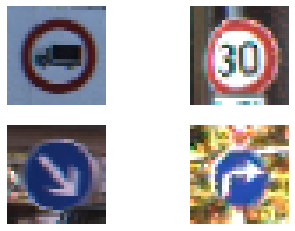

In [60]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
from tensorflow.keras.preprocessing import image

fig, axes = plt.subplots(nrows=2, ncols=2)

for i in range(4):
  img_path = './0000%d.png' % (i % 4)
  print(img_path)
  img = image.load_img(img_path, target_size=(28, 28))
  plt.subplot(2,2,i+1)
  plt.imshow(img);
  plt.axis('off');

In [61]:
%cd /content
model = tf.keras.models.load_model('my_model.h5')

/content


/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
prediction shape: (1, 43)
Predicted Image class: Vechiles Over 3.5 Metric Tons Prohibited
prediction shape: (1, 43)
Predicted Image class: Speed Limit (30Km/H)
prediction shape: (1, 43)
Predicted Image class: Keep Right
prediction shape: (1, 43)
Predicted Image class: Turn Right Ahead


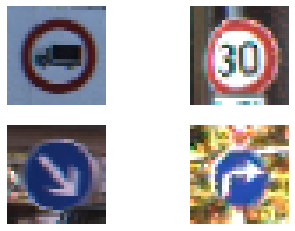

In [62]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
for i in range(4):
  img_path = './0000%d.png'%i
  img = image.load_img(img_path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  print("prediction shape:", preds.shape)
  classes = np.argmax(preds, axis = 1)
  print('Predicted Image class:', labels[int(classes)])
  plt.subplot(2,2,i+1)
  plt.imshow(img);
  plt.axis('off');

In [63]:
# Save the entire model as a SavedModel.
model.save('TF_saved_model') 

INFO:tensorflow:Assets written to: TF_saved_model/assets


INFO:tensorflow:Assets written to: TF_saved_model/assets


In [64]:
!saved_model_cli show --all --dir TF_saved_model


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 3)
        name: serving_default_conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 43)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs:

## Inference with native TF2.8 saved model

In [65]:
%cd /content
model = tf.keras.models.load_model('TF_saved_model')

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
prediction shape: (1, 43)
Predicted Image class: Vechiles Over 3.5 Metric Tons Prohibited


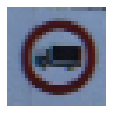

In [66]:
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Test
img_path = './00000.png' 
img = image.load_img(img_path, target_size=(28, 28))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

preds = model.predict(x)
print("prediction shape:", preds.shape)
classes = np.argmax(preds, axis = 1)
print('Predicted Image class:', labels[int(classes)])
plt.subplot(2,2,i+1)
plt.imshow(img);
plt.axis('off');

In [67]:
batch_size = 8
batched_input = np.zeros((batch_size, 28, 28, 3), dtype=np.float32)

for i in range(batch_size):
  img_path = './0000%d.png' % (i % 4)
  img = image.load_img(img_path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  batched_input[i, :] = x
batched_input = tf.constant(batched_input)
print('batched_input shape: ', batched_input.shape)

batched_input shape:  (8, 28, 28, 3)


In [68]:
# Benchmarking throughput
import time
N_warmup_run = 50
N_run = 1000
elapsed_time = []

for i in range(N_warmup_run):
  preds = model.predict(batched_input)

for i in range(N_run):
  start_time = time.time()
  preds = model.predict(batched_input)
  end_time = time.time()
  elapsed_time = np.append(elapsed_time, end_time - start_time)
  if i % 50 == 0:
    print('Step {}: {:4.1f}ms'.format(i, (elapsed_time[-50:].mean()) * 1000))

print('Throughput: {:.0f} images/s'.format(N_run * batch_size / elapsed_time.sum()))

Step 0: 46.0ms
Step 50: 47.9ms
Step 100: 47.8ms
Step 150: 48.1ms
Step 200: 48.2ms
Step 250: 48.1ms
Step 300: 52.4ms
Step 350: 86.0ms
Step 400: 54.3ms
Step 450: 49.1ms
Step 500: 48.6ms
Step 550: 48.8ms
Step 600: 48.1ms
Step 650: 49.5ms
Step 700: 49.1ms
Step 750: 48.8ms
Step 800: 56.7ms
Step 850: 49.9ms
Step 900: 49.5ms
Step 950: 51.7ms
Throughput: 155 images/s


## TF saved Model

In [117]:
sign_model = tf.keras.models.load_model('saved_model/my_model')
print(sign_model)

## Check predictions on loaded model

In [119]:
# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(val_ds))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 28, 28, 3)


In [120]:
tf_model_predictions = sign_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 43)


In [121]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Speed Limit (20Km/H),Speed Limit (30Km/H),No Passing For Vechiles Over 3.5 Metric Tons,Right-Of-Way At The Next Intersection,Priority Road,Yield,Stop,No Vechiles,Vechiles Over 3.5 Metric Tons Prohibited,No Entry,...,Keep Left,Speed Limit (70Km/H),Roundabout Mandatory,End Of No Passing,End Of No Passing By Vechiles Over 3.5 Metric Tons,Speed Limit (80Km/H),End Of Speed Limit (80Km/H),Speed Limit (100Km/H),Speed Limit (120Km/H),No Passing
0,-12.179914,-8.035530,-71.327202,-25.706886,-5.832005,-17.864176,-27.057848,-10.648173,-16.328325,-51.741318,...,-14.961132,-9.416917,-4.005479,2.076831,-19.323488,-18.143631,4.862083,-38.045624,-18.256504,-27.774694
1,-79.969643,-27.639112,-15.934636,-79.034233,-28.129700,-17.520714,-40.119419,-27.465286,-45.538582,-47.757702,...,-2.536027,-28.385845,-0.915768,-40.487782,-0.279298,-26.423244,-43.249302,-12.708397,-21.187916,-34.952465
2,-21.746094,-25.191071,-57.377071,-45.950306,53.019215,-9.717566,-102.013916,-31.366627,-72.290581,-27.674915,...,-76.289444,-48.500702,51.155087,-33.299637,-46.478973,-31.686386,-82.095634,-87.875259,-26.495890,-42.734097
3,-100.467476,-12.618528,-112.608887,-107.847237,1.759489,-37.528721,-155.285919,-160.614807,-139.163757,-140.855362,...,-77.028831,-23.899443,31.950445,-157.985825,-73.492142,-17.227377,-49.043102,-117.893425,-42.211006,-180.154541
4,-139.454468,-18.529306,-11.895250,-104.488678,19.395403,-12.862663,-103.001404,-54.176712,38.181122,8.155737,...,-76.278572,-2.586413,37.947823,-3.383764,-42.249260,-44.777615,-146.944153,-102.028389,-55.213566,-17.480009


## TFlite model

In [124]:
open("model.tflite", "wb").write(tflite_model)

415360

In [125]:
optimize="Speed"
if optimize=='Speed':
    converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]
elif optimize=='Storage':
     converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
else:    
    converter.optimizations = [tf.lite.Optimize.DEFAULT]#reduce the size of a floating point model by quantizing the weights to float16
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()#save the quanitized model toa binary file
open("model_quant_tl.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpomw252lh/assets


INFO:tensorflow:Assets written to: /tmp/tmpomw252lh/assets


210736

In [126]:
# # Save the model.
# with open('quant_model.tflite', 'wb') as f:
#   f.write(tflite_quant_model)

In [127]:
# import tflite_runtime.interpreter as tflite
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)#allocate the tensors
interpreter.allocate_tensors()

In [128]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_conv2d_input:0
shape: [ 1 28 28  3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [ 1 43]
type: <class 'numpy.float32'>


In [130]:
interpreter.resize_tensor_input(input_details[0]['index'], (32, 28, 28, 3))
interpreter.resize_tensor_input(output_details[0]['index'], (32, 5))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_conv2d_input:0
shape: [32 28 28  3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [32 43]
type: <class 'numpy.float32'>


In [131]:
interpreter.set_tensor(input_details[0]['index'], val_image_batch)

interpreter.invoke()

tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (32, 43)


In [132]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = labels

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

TFLite prediction results for the first elements


,Speed Limit (20Km/H),Speed Limit (30Km/H),No Passing For Vechiles Over 3.5 Metric Tons,Right-Of-Way At The Next Intersection,Priority Road,Yield,Stop,No Vechiles,Vechiles Over 3.5 Metric Tons Prohibited,No Entry,...,Keep Left,Speed Limit (70Km/H),Roundabout Mandatory,End Of No Passing,End Of No Passing By Vechiles Over 3.5 Metric Tons,Speed Limit (80Km/H),End Of Speed Limit (80Km/H),Speed Limit (100Km/H),Speed Limit (120Km/H),No Passing
0,-12.186995,-8.033624,-71.356445,-25.724506,-5.833229,-17.853001,-27.057945,-10.654444,-16.351570,-51.738197,...,-14.936405,-9.423340,-4.005042,2.080862,-19.332554,-18.146252,4.870648,-38.057549,-18.267279,-27.771238
1,-79.973526,-27.628687,-15.946446,-79.019814,-28.130436,-17.503250,-40.119316,-27.465740,-45.561962,-47.744896,...,-2.533989,-28.385817,-0.916488,-40.503239,-0.302297,-26.416224,-43.266537,-12.707907,-21.192608,-34.967560
2,-21.753241,-25.213242,-57.354153,-45.929520,53.027367,-9.733685,-102.024803,-31.359013,-72.325249,-27.679499,...,-76.268036,-48.518208,51.115398,-33.330681,-46.509365,-31.686846,-82.101738,-87.864990,-26.472565,-42.722980
3,-100.474937,-12.623774,-112.637726,-107.876373,1.751353,-37.542072,-155.327164,-160.637955,-139.195206,-140.889786,...,-76.999130,-23.900745,31.953693,-157.990433,-73.507187,-17.230354,-49.051769,-117.886345,-42.220177,-180.187485
4,-139.451752,-18.510977,-11.883077,-104.465897,19.372566,-12.840250,-102.976334,-54.169743,38.162994,8.136221,...,-76.271294,-2.588146,37.928024,-3.369828,-42.256691,-44.758671,-146.883392,-102.019203,-55.202988,-17.466324


Now let's do the same for TFLite quantized model:
- Load model,
- Reshape input to handle batch of images,
- Run prediction

In [139]:
# Load quantized TFLite model
tflite_interpreter_quant = tf.lite.Interpreter(model_path='quant_model.tflite')

# Learn about its input and output details
input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

# Resize input and output tensors to handle batch of 32 images
tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (32, 28, 28, 3))
tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (32, 5))
tflite_interpreter_quant.allocate_tensors()

input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

# Run inference
tflite_interpreter_quant.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter_quant.invoke()

tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
print("\nPrediction results shape:", tflite_q_model_predictions.shape)

== Input details ==
name: serving_default_conv2d_input:0
shape: [32 28 28  3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [32 43]
type: <class 'numpy.float32'>

Prediction results shape: (32, 43)


In [140]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)
tflite_q_pred_dataframe.columns = labels

print("Quantized TFLite model prediction results for the first elements")
tflite_q_pred_dataframe.head()

Quantized TFLite model prediction results for the first elements


,Speed Limit (20Km/H),Speed Limit (30Km/H),No Passing For Vechiles Over 3.5 Metric Tons,Right-Of-Way At The Next Intersection,Priority Road,Yield,Stop,No Vechiles,Vechiles Over 3.5 Metric Tons Prohibited,No Entry,...,Keep Left,Speed Limit (70Km/H),Roundabout Mandatory,End Of No Passing,End Of No Passing By Vechiles Over 3.5 Metric Tons,Speed Limit (80Km/H),End Of Speed Limit (80Km/H),Speed Limit (100Km/H),Speed Limit (120Km/H),No Passing
0,-12.186995,-8.033624,-71.356445,-25.724506,-5.833229,-17.853001,-27.057945,-10.654444,-16.351570,-51.738197,...,-14.936405,-9.423340,-4.005042,2.080862,-19.332554,-18.146252,4.870648,-38.057549,-18.267279,-27.771238
1,-79.973526,-27.628687,-15.946446,-79.019814,-28.130436,-17.503250,-40.119316,-27.465740,-45.561962,-47.744896,...,-2.533989,-28.385817,-0.916488,-40.503239,-0.302297,-26.416224,-43.266537,-12.707907,-21.192608,-34.967560
2,-21.753241,-25.213242,-57.354153,-45.929520,53.027367,-9.733685,-102.024803,-31.359013,-72.325249,-27.679499,...,-76.268036,-48.518208,51.115398,-33.330681,-46.509365,-31.686846,-82.101738,-87.864990,-26.472565,-42.722980
3,-100.474937,-12.623774,-112.637726,-107.876373,1.751353,-37.542072,-155.327164,-160.637955,-139.195206,-140.889786,...,-76.999130,-23.900745,31.953693,-157.990433,-73.507187,-17.230354,-49.051769,-117.886345,-42.220177,-180.187485
4,-139.451752,-18.510977,-11.883077,-104.465897,19.372566,-12.840250,-102.976334,-54.169743,38.162994,8.136221,...,-76.271294,-2.588146,37.928024,-3.369828,-42.256691,-44.758671,-146.883392,-102.019203,-55.202988,-17.466324


In [141]:
# Concatenate results from all models

all_models_dataframe = pd.concat([tf_pred_dataframe, 
                                  tflite_pred_dataframe, 
                                  tflite_q_pred_dataframe], 
                                 keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                 axis='columns')
all_models_dataframe.head()

TF Model                       \
  Speed Limit (20Km/H) Speed Limit (30Km/H)   
0           -12.179914            -8.035530   
1           -79.969643           -27.639112   
2           -21.746094           -25.191071   
3          -100.467476           -12.618528   
4          -139.454468           -18.529306   

                                                \
  No Passing For Vechiles Over 3.5 Metric Tons   
0                                   -71.327202   
1                                   -15.934636   
2                                   -57.377071   
3                                  -112.608887   
4                                   -11.895250   

                                                                              \
  Right-Of-Way At The Next Intersection Priority Road      Yield        Stop   
0                            -25.706886     -5.832005 -17.864176  -27.057848   
1                            -79.034233    -28.129700 -17.520714  -40.119419   
2                            -45.950306     53.019215  -9.717566 -102.013916   
3                           -107.847237      1.759489 -37.528721 -155.285919   
4                           -104.488678     19.395403 -12.862663 -103.001404   

                                                                    ...  \
  No Vechiles Vechiles Over 3.5 Metric Tons Prohibited    No Entry  ...   
0  -10.648173                               -16.328325  -51.741318  ...   
1  -27.465286                               -45.538582  -47.757702  ...   
2  -31.366627                               -72.290581  -27.674915  ...   
3 -160.614807                              -139.163757 -140.855362  ...   
4  -54.176712                                38.181122    8.155737  ...   

  TFLite quantized                                            \
         Keep Left Speed Limit (70Km/H) Roundabout Mandatory   
0       -14.936405            -9.423340            -4.005042   
1        -2.533989           -28.385817            -0.916488   
2       -76.268036           -48.518208            51.115398   
3       -76.999130           -23.900745            31.953693   
4       -76.271294            -2.588146            37.928024   

                                                                        \
  End Of No Passing End Of No Passing By Vechiles Over 3.5 Metric Tons   
0          2.080862                                         -19.332554   
1        -40.503239                                          -0.302297   
2        -33.330681                                         -46.509365   
3       -157.990433                                         -73.507187   
4         -3.369828                                         -42.256691   

                                                                          \
  Speed Limit (80Km/H) End Of Speed Limit (80Km/H) Speed Limit (100Km/H)   
0           -18.146252                    4.870648            -38.057549   
1           -26.416224                  -43.266537            -12.707907   
2           -31.686846                  -82.101738            -87.864990   
3           -17.230354                  -49.051769           -117.886345   
4           -44.758671                 -146.883392           -102.019203   

                                     
  Speed Limit (120Km/H)  No Passing  
0            -18.267279  -27.771238  
1            -21.192608  -34.967560  
2            -26.472565  -42.722980  
3            -42.220177 -180.187485  
4            -55.202988  -17.466324  

[5 rows x 129 columns]

In [142]:
# Swap columns to hava side by side comparison

all_models_dataframe = all_models_dataframe.swaplevel(axis='columns')[tflite_pred_dataframe.columns]
all_models_dataframe.head()

Speed Limit (20Km/H)                              Speed Limit (30Km/H)  \
              TF Model      TFLite TFLite quantized             TF Model   
0           -12.179914  -12.186995       -12.186995            -8.035530   
1           -79.969643  -79.973526       -79.973526           -27.639112   
2           -21.746094  -21.753241       -21.753241           -25.191071   
3          -100.467476 -100.474937      -100.474937           -12.618528   
4          -139.454468 -139.451752      -139.451752           -18.529306   

                              No Passing For Vechiles Over 3.5 Metric Tons  \
      TFLite TFLite quantized                                     TF Model   
0  -8.033624        -8.033624                                   -71.327202   
1 -27.628687       -27.628687                                   -15.934636   
2 -25.213242       -25.213242                                   -57.377071   
3 -12.623774       -12.623774                                  -112.608887   
4 -18.510977       -18.510977                                   -11.895250   

                               Right-Of-Way At The Next Intersection  ...  \
       TFLite TFLite quantized                              TF Model  ...   
0  -71.356445       -71.356445                            -25.706886  ...   
1  -15.946446       -15.946446                            -79.034233  ...   
2  -57.354153       -57.354153                            -45.950306  ...   
3 -112.637726      -112.637726                           -107.847237  ...   
4  -11.883077       -11.883077                           -104.488678  ...   

  End Of Speed Limit (80Km/H) Speed Limit (100Km/H)              \
             TFLite quantized              TF Model      TFLite   
0                    4.870648            -38.045624  -38.057549   
1                  -43.266537            -12.708397  -12.707907   
2                  -82.101738            -87.875259  -87.864990   
3                  -49.051769           -117.893425 -117.886345   
4                 -146.883392           -102.028389 -102.019203   

                   Speed Limit (120Km/H)                              \
  TFLite quantized              TF Model     TFLite TFLite quantized   
0       -38.057549            -18.256504 -18.267279       -18.267279   
1       -12.707907            -21.187916 -21.192608       -21.192608   
2       -87.864990            -26.495890 -26.472565       -26.472565   
3      -117.886345            -42.211006 -42.220177       -42.220177   
4      -102.019203            -55.213566 -55.202988       -55.202988   

   No Passing                               
     TF Model      TFLite TFLite quantized  
0  -27.774694  -27.771238       -27.771238  
1  -34.952465  -34.967560       -34.967560  
2  -42.734097  -42.722980       -42.722980  
3 -180.154541 -180.187485      -180.187485  
4  -17.480009  -17.466324       -17.466324  

[5 rows x 129 columns]

In [143]:
# Highlight TFLite models predictions that are different from original model

def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('TF Model', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

all_models_dataframe.style.apply(highlight_diff, axis=None)

As we can see, in most cases predictions are different between all models, usually by small factors. High-confidence predictions between TensorFlow and TensorFlow Lite models are very close to each other (in some cases there are even similar).  
Quantized model outstands the most, but this is the cost of optimizations (model weights 3-4 times less).

- model.tflite : 415360 KB = 415.36 MB
- model_quant_tl.tflite : 210736 KB = 210.736

# Part 4 : REST API

In [149]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [150]:
# TensorFlow and tf.keras
print("Installing dependencies for Colab environment")
!pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4 MB 12.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
TensorFlow version: 2.8.0


In [151]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [152]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  13625      0 --:--:-- --:--:-- --:--:-- 13625
OK
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B

In [155]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 29s (11.7 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155202 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


In [159]:
os.environ["MODEL_DIR"] = '/content/saved_model/my_model'

In [164]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=sign_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [165]:
!tail server.log

2022-05-03 06:27:23.265077: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable sign_model found under base path /content/saved_model/my_model. Did you forget to name your leaf directory as a number (eg. '/1/')?
2022-05-03 06:27:24.265143: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable sign_model found under base path /content/saved_model/my_model. Did you forget to name your leaf directory as a number (eg. '/1/')?
2022-05-03 06:27:25.265231: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable sign_model found under base path /content/saved_model/my_model. Did you forget to name your leaf directory as a number (eg. '/1/')?
2022-05-03 06:27:26.265367: W tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:268] No versions of servable sign_model found under base path /content/saved_model/my_model. Did 